In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def show(image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.show()
    
def export(imagename):
    cv2.imwrite(imagename+".jpg", eval(imagename))

In [3]:
# bastian = cv2.cvtColor(cv2.imread("img/bastian.png"), cv2.COLOR_BGR2RGB)
# bastian_triggered = cv2.cvtColor(cv2.imread("img/bastian_triggered.png"), cv2.COLOR_BGR2RGB)

# bastian = cv2.resize(bastian, (600,600))
# bastian_triggered = cv2.resize(bastian_triggered, (600,600))

target_DPI = 300
sheet_LPI = 40
image_PPI = target_DPI / sheet_LPI
views_N = 2
striped_pixels = image_PPI / views_N

In [4]:
image_PPI

7.5

In [14]:
# anjachris = cv2.cvtColor(cv2.imread("img/AnjaChris_cropped.png"), cv2.COLOR_BGR2RGB)
# mirigio = cv2.cvtColor(cv2.imread("img/MiriGio_cropped.png"), cv2.COLOR_BGR2RGB)

# anjachris = cv2.resize(anjachris, (1181, 1772))
# mirigio = cv2.resize(mirigio, (1181, 1772))

In [33]:
# black_sheet = 0*np.ones((1772, 50, 3))
# white_sheet = 255*np.ones((1772, 50, 3))

In [22]:
a1 = cv2.cvtColor(cv2.imread("img/Apple_1.png"), cv2.COLOR_BGR2RGB)
a2 = cv2.cvtColor(cv2.imread("img/Apple_2.png"), cv2.COLOR_BGR2RGB)

In [23]:
aspect_ratio = a1.shape[1] / a1.shape[0]
new_size = (int(target_DPI * 4 * aspect_ratio), target_DPI * 4)

a1 = cv2.resize(a1, new_size)
a2 = cv2.resize(a2, new_size)

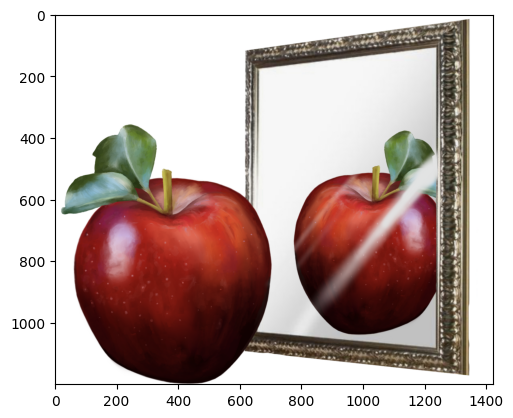

In [24]:
plt.imshow(a1)

In [25]:
def interlace2v(image1, image2, vertical=True, lpi=40, dpi=300):
    stripe_pixels = dpi / lpi / 2
    
    if vertical==False: # i.e. horizontal==True
        image1 = image1.transpose((1,0,2))
        image2 = image2.transpose((1,0,2))
        
    image_size = image1.shape[:2]
    if image2.shape[:2] != image_size:
        print("Image sizes don't match.")
        return None
        
    mask1 = np.tile((np.arange(image_size[0]) // stripe_pixels) % 2, (image_size[1],1)).T
    mask2 = np.absolute(mask1 - 1)

    image_output = image1 * mask1[:,:,np.newaxis] + image2 * mask2[:,:,np.newaxis]

    if vertical == False:
        image_output = image_output.transpose((1,0,2))

    return image_output.astype("int")

In [26]:
apples_interlaced = interlace2v(a1, a2, vertical=True)

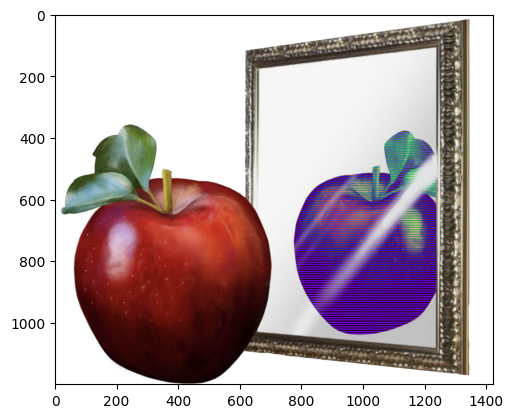

In [27]:
plt.imshow(apples_interlaced)

In [28]:
cv2.imwrite("img/apples_interlaced.png", cv2.cvtColor(np.float32(apples_interlaced), cv2.COLOR_BGR2RGB))

True

In [33]:
5 * 15.4 / 15.0

5.133333333333334